# Set Cover問題

Set Cover問題の問題設定はExact Cover問題と似ています。  
集合$U$とその部分集合族$V$があるとき、和集合が$U$と一致するような$W\subseteq V$の中で、$W$の要素数が最小となるような$W$の選び方を考えます。  
Exact Cover問題では$W$の中に$U$の要素が重複しないものを考えていましたが、Set Cover問題ではこれを許容します。  
例えば  
$U = \{ 0, 1, 2, 3, 4, 5\}$  
$V = \{\{0\},\{1\},\{2\},\{3\},\{4\},\{5\},\{0,1,2,3\},\{2,3,4,5\}\}$  
が与えられた時、Exact Cover問題では  
$W = \{\{0\},\{1\},\{2\},\{3\},\{4\},\{5\}\}$  
が望ましい解でしたが、Set Cover問題では  
$W = \{\{0,1,2,3\},\{2,3,4,5\}\}$  
が望ましい解となります。  

# ハミルトニアン

ハミルトニアンは次の論文を参考にします( https://arxiv.org/abs/1302.5843 )。  
$H = H _ A + H _ B$  
$\displaystyle H _ { A }= A \sum _ { \alpha = 1 } ^ { n }\left( 1 - \sum _ { m = 1 } ^ { N } x _ { \alpha , m } \right) ^ { 2 }+ A \sum _ { \alpha = 1 } ^ { n } \left( \sum _ { m = 1 } ^ { N } m x _ { \alpha , m } - \sum _ { i : \alpha \in V_i } x_i \right) ^ { 2 }$  
$\displaystyle H_B = B \sum _ { i = 1 } ^ { N } x_i$  
$H_A$は$\alpha \in U$が選択した$W$の中に少なくとも一度は現れることを保証するための制約関数、  
$H_B$は$W$の要素数を最小とするための目的関数です。  
このハミルトニアン$H$を最小化するような解を求めます。  
以下でもう少し詳しく中身を見ていきますが、少し長いので不要な方はスキップして下さい。

## ハミルトニアン詳細

ハミルトニアンの中には2種類の変数$x_i$と$x_{\alpha , m}$が登場します。  
$x_i$は$V_i$を解として選択したかどうかを表します。つまり、   
$
x_i =
\begin{cases}
     1 & (V_i \in W) \\
     0 & (otherwise)
\end{cases}
$  
となります。これがこの問題で求めたい解そのものとなります。  
  
一方$x_{\alpha , m}$は制約関数を表現するための補助変数です。  
$\alpha \in U$が解$W$の中に$m$回現れる時に$x_{\alpha , m} = 1$となります。  
少しわかりづらいですが、上記の例($W = \{\{ 0,1,2,3 \},\{2,3,4,5\}\}$)で確認してみると  
$W$の中に$0, 1, 4, 5 \in U$は1つずつ、$2,3 \in U$は2つずつ含まれているので  
$\begin{align*}
x_{0,1} &= 1 , \quad x_{0, m \neq 1} = 0 \\
x_{1,1} &= 1 , \quad x_{1, m \neq 1} = 0 \\
x_{4,1} &= 1 , \quad x_{4, m \neq 1} = 0 \\
x_{5,1} &= 1 , \quad x_{5, m \neq 1} = 0 \\
x_{2,2} &= 1 , \quad x_{2, m \neq 2} = 0 \\
x_{3,2} &= 1 , \quad x_{3, m \neq 2} = 0
\end{align*}$  
となります。  

## $H_A$について
$H_A$は解$W$の中に$\alpha \in U$が全て含まれていることを保証するための項となります。  
$x_{\alpha , m}$は$x_i$が問題の条件を満たしているかどうかを確認するための補助変数ということになります。  
  
$H_A$の第一項は$x_{\alpha, m}$が各$\alpha$についてただひとつの$m$で$x_{\alpha, m} = 1$となるような制約項です。  
このときこの項は最小値0をとります。  
各$\alpha$について複数の$m$で$x_{\alpha, m} = 1$となったり、逆に解の中に一つも含まれない場合、この項の値は増加してしまいます。

$H_A$の第二項はもう少し複雑です。  
$\displaystyle \sum _ { i : \alpha \in V_i } x_i$は、各$\alpha$について、解$W$の中に$\alpha$がいくつ含まれているかを表しています。  
先ほどの例で言えば$0, 1, 4, 5 \in U$は1つずつ、$2,3 \in U$は2つずつ含まれていたのでした。  
$\displaystyle \sum _ { m = 1 } ^ { N } m x _ { \alpha , m }$は各$\alpha$についてただひとつの$m$で$x_{\alpha, m} = 1$となる
場合に、同様に解Wの中に$\alpha$がいくつ含まれているかを表します。  
このとき第二項は全体で最小値0をとります。  
複数の$m$で$x_{\alpha, m} = 1$となったり、逆に解の中に一つも含まれない場合、この項の値も第一項と同様に増加してしまいます。   

## $H_B$について
$H_B$は目的関数を表しており、$W$の要素数が小さいときにこの値も小さくなります。  
できる限り少ない要素で$U$をカバーしたいという目的を表しています。  

## 係数$A$と$B$について
係数$A$と$B$は問題によって適切なスケールの値を設定する必要があります。  
考え方としては、"制約条件を破ってまで目的関数を最小化してしまわない"ように選ぶことになります。  
$H$の値は$H_A$と$H_B$のバランスで決まりますが、極端な例として$\frac{B}{A} = 1000$となるような状況を考えると、明らかに$H_B$の寄与が大きくなってしまい、制約($H_A$)を無視して目的($H_B$)を優先する様子が想像できると思います。 
  
$A$と$B$のバランスの考え方は問題ごとに考えなければいけませんが、今回は最適解$W_{opt}$が得られている状況で、$W_{opt}$から要素数をさらに一つ減らす(目的関数をさらに小さくするように欲張る)ケースを考えてみます。  
この時$W_{opt}$は最適解なので、一つ要素を減らすと必ず制約条件は破れてしまうことになります。  
最もゆるく制約条件を破る状況を考えると、それは要素数が1の集合を$W_{opt}$から外すときとなります(そのような集合が解に含まれているケースを想定しています)。  
この時、$\Delta H_A = A$, $\Delta H_B = -B$となります(計算の詳細は省略しますが、簡単に確認できます)。  
よってこのようなことを許容しないためには$ 0 < B < A$を満たすように$A, B$を設定すればよいことになります。  

# QUBO行列の構築
前置きが長くなりましたが、いよいよQUBO行列を計算していきます。  
$H_A$はQUBOに落とし込みやすいように式を変形します。  
定数項はQUBO行列と無関係なので省略しています。  
少々複雑ですが、式変形に用いているのは  
$x_{\alpha, m} = x_{\alpha, m} ^ 2$  
$x_i = x_i ^ 2$  
だけです。  

$H _ { A }$  
$ \displaystyle
=A \sum _ { \alpha = 1 } ^ { n } \left\{
    -2 \left( \sum _ { m = 1 } ^ { N } x _ { \alpha , m } \right)
    +\left( \sum _ { m = 1 } ^ { N } x _ { \alpha , m } \right) ^ { 2 }
    +\left( \sum _ { m = 1 } ^ { N } mx _ { \alpha , m } \right) ^ { 2 }
    -2 \left( \sum _ { m = 1 } ^ { N } mx _ { \alpha , m } \right) \left( \sum _ { i : \alpha \in V _ { i } } x _ { i } \right)
    +\left( \sum _ { i : \alpha \in V _ { i } } x _ { i } \right) ^ 2 \right\}
$  

$ \displaystyle
= A \sum _ { \alpha = 1} ^ { n } \left\{
    \left( \sum _ { m = 1 } ^ { N } -2 x _ { \alpha , m } \right)
   +\left( \sum _ { m = 1 } ^ { N } x _ { \alpha , m } ^ 2 \right)
   +\left( \mathop { \sum \sum } _ { m \neq l } ^ { N } 2 x _ { \alpha , m } x _ { \alpha , l } \right)
   +\left( \sum _ { m = 1 } ^ { N } m ^ 2 x _ { \alpha , m } ^ 2 \right)
\right.
$  

$ \displaystyle
\quad \left.
   +\left( \mathop { \sum \sum } _ {m \neq l } ^ { N } 2ml x _ { \alpha , m } x _ { \alpha, l } \right)
   +\left( \sum _ { m = 1} ^ { N } \sum _ { i : \alpha \in V _ { i } } \left( -2m x _ { \alpha , m } x _ { i } \right) \right)
   +\left( \sum _ { i : \alpha \in V _ { i } } x _ { i } ^ 2 \right)
   +\left( \sum _ { i : \alpha \in V _ { i } } \sum _ { j : \alpha \in V _ { j }} 2 x _ { i } x _ { j }　\right) \right\}
$  

$ \displaystyle
= A \sum _ { \alpha = 1} ^ { n } \left\{
    \sum _ { m = 1 } ^ { N } \left( m ^ 2 - 1\right) x _ { \alpha , m } ^ 2
   +\mathop { \sum \sum } _ { m \neq l } ^ { N } 2 \left( 1 + ml \right) x _ { \alpha , m } x _ { \alpha , l }
   +\sum _ { m = 1} ^ { N } \sum _ { i : \alpha \in V _ { i } } \left( -2m \right) x _ { \alpha , m } x _ { i }
   +\sum _ { i : \alpha \in V _ { i } } x _ { i } ^ 2
   +\sum _ { i : \alpha \in V _ { i } } \sum _ { j : \alpha \in V _ { j }} 2 x _ { i } x _ { j } \right\}
$  


ここから実際にwildqatを使用して問題を解いていきます。  
blueqatをインストールされていない方は以下のような方法でご準備ください。

In [1]:
!pip install blueqat

     |████████████████████████████████| 51kB 2.6MB/s 


In [0]:
import numpy as np
import blueqat.wq as wq
import matplotlib.pyplot as plt

次にqubo行列を計算するための関数を作ります。  
ここで注意すべきなのは、$m, l$は順番を表すインデックスではないのでループ変数にする際に勝手に$0 \lt m, l \lt N - 1$にしてはいけないということです。  
$\alpha \in U$は、少なくとも1個(最大$N$個)は解に含まれていることが必要なので、$1 \leq m, l \leq N$とします。

In [0]:
def get_qubo(U, V, A, B):
    n = len(U)
    N = len(V)
    size = n * N + N
    qubo = np.zeros((size, size))
    
    # HA
    alpha_m_l = [(alpha, m, l) for alpha in range(n) for m in range(1, N + 1) for l in range(1, N + 1)]
    for alpha, m, l in alpha_m_l:
        u = alpha * N + m - 1
        v = alpha * N + l - 1
        if u == v:
            qubo[u][v] = m ** 2 - 1
        elif u < v:
            qubo[u][v] = 2 * (1 + m * l)
        
        i = m - 1
        j = l - 1
        v = n * N + j
        if U[alpha] in V[j]:
            qubo[u][v] = -2 * m

        u = n * N + i
        if U[alpha] in V[i] and U[alpha] in V[j]:
            if u == v:
                qubo[u][v] += 1
            elif u < v:
                qubo[u][v] += 2
    qubo *= A

    # HB
    for i in range(n * N, n * N + N):
        qubo[i][i] += B

    return qubo

$H_A$の部分のコードが(我ながら)わかりにくいのでループの無駄が多いですがわかりやすくしたバージョンも書いておきます(使いません)。  
こちらは$H_A$を式変形した最終結果の5つの項をそれぞれ順番に計算しています。

In [0]:
def get_qubo_easy_to_understand_ver(U, V, A, B):
    n = len(U)
    N = len(V)
    size = n * N + N
    qubo = np.zeros((size, size))

    # HA
    for alpha in range(n): # x_(alpha, m) * x_(alpha, m)
        for m in range(1, N + 1):
            u = alpha * N + m - 1
            qubo[u][u] = m ** 2 - 1

    for alpha in range(n): # x_(alpha, m) * x_(alpha, l)
        for m in range(1, N + 1):
            for l in range(1, N + 1):
                u = alpha * N + m - 1
                v = alpha * N + l - 1
                if u >= v:
                    continue
                qubo[u][v] = 2 * (1 + m * l)

    for alpha in range(n): # x_(alpha, m) * x_(i)
        for m in range(1, N + 1):
            for i in range(N):
                u = alpha * N + m - 1
                v = n * N + i
                if U[alpha] in V[i]:
                    qubo[u][v] = -2 * m

    for i in range(N): # x_(i) * x_(i)
        u = n * N + i
        qubo[u][u] = len(V[i]) # alphaで和をとると結局V[i]の要素数になるので

    for alpha in range(n): # x_(i) * x_(j)
        for i in range(N):
            for j in range(N):
                if i >= j:
                    continue
                u = n * N + i
                v = n * N + j
                if U[alpha] in V[i] and U[alpha] in V[j]:
                    qubo[u][v] += 2
    qubo *= A

    # HB
    for i in range(n * N, n * N + N):
        qubo[i][i] += B

    return qubo

答えを表示する用の関数も準備しておきます。

In [0]:
def show_answer(q, U, V):
    print(f"q = {q}")
    n = len(U)
    N = len(V)
    W = []
    for alpha in range(n):
        m_list = []
        for m in range(1, N + 1):
            if q[alpha  * N + m - 1] > 0:
                m_list.append(m)
        print(f"x_({alpha}, m) = {m_list}")
        if len(m_list) > 1:
            print(f"x_({alpha}, m)が複数のmで1となっています。制約条件を満たしていません。")
        elif len(m_list) == 0:
            print(f"x_({alpha}, m)が全てのmで0となっています。制約条件を満たしていません。")
    for i in range(N):
        if q[n * N + i] > 0:
            W.append(V[i])
    print("W =", W)

ようやく準備ができたのでテストをしてみます。

q = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
x_(0, m) = [1]
x_(1, m) = [2]
x_(2, m) = [2]
x_(3, m) = [2]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[1], [0, 1, 2, 3], [2, 3, 4, 5]]


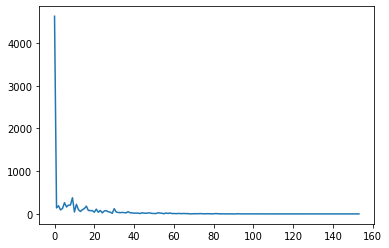

q = [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
x_(0, m) = [3]
x_(1, m) = [1]
x_(2, m) = [1]
x_(3, m) = [1]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[0], [4], [5], [0, 1, 2, 3]]


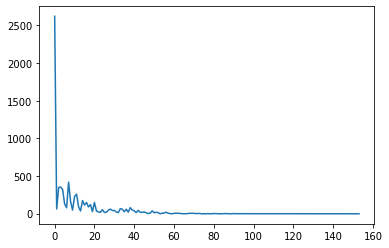

q = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
x_(0, m) = [1]
x_(1, m) = [1]
x_(2, m) = [2]
x_(3, m) = [1]
x_(4, m) = [2]
x_(5, m) = [3]
W = [[4], [5], [0, 1, 2, 3], [2, 3, 4, 5]]


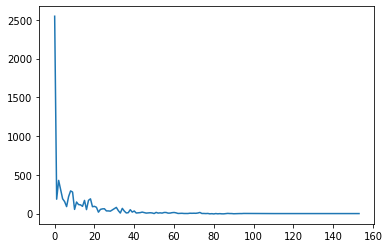

q = [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
x_(0, m) = [2]
x_(1, m) = [1]
x_(2, m) = [2]
x_(3, m) = [3]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[0], [3], [0, 1, 2, 3], [2, 3, 4, 5]]


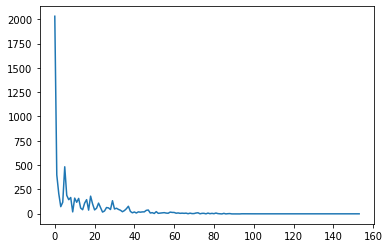

q = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
x_(0, m) = [1]
x_(1, m) = [1]
x_(2, m) = [2]
x_(3, m) = [3]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[3], [0, 1, 2, 3], [2, 3, 4, 5]]


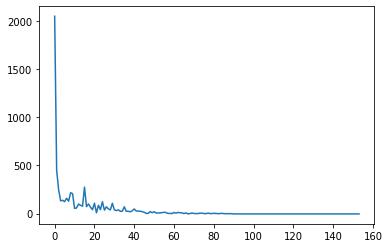

In [7]:
# 問題設定
U = [0,1,2,3,4,5]
V = [[0],[1],[2],[3],[4],[5],[0,1,2,3],[2,3,4,5]]

# QUBOの係数
A = 1.2
B = 1

annealer = wq.Opt()
annealer.qubo = get_qubo(U, V, A, B)
annealer.Ts *= 10 # A, Bの値のオーダーに合わせて開始温度を調整(デフォルトだと収束が早すぎたため)
for _ in range(5):
    q = annealer.sa()
    show_answer(q, U, V)
    plt.plot(annealer.E)
    plt.show()

何度か試した中で正解がでるのは平均すると5回中1回ぐらいでした。
また、$W(x_i)$が正しくても、$x_{\alpha,m}$は正しくないこともよく起こります。